# Purpose of the analysis

This study aims to evaluate the impact of various factors on an individual’s risk of developing coronary heart disease (CHD) within the next decade.

To achieve this goal, it is necessary to conduct statistical analysis on individual health data related to CHD. This data covers multiple aspects, including personal basic information, living habits, health status, and medical test indicators. Through in-depth analysis of this data, we can identify key factors closely associated with the risk of CHD onset.The results of this study can be used to develop a CHD risk prediction model. This model will help medical institutions and healthcare providers assess the likelihood of an individual developing CHD in the future. Data analysis will assist healthcare providers in making more informed decisions when formulating preventive measures, diagnostic plans, and treatment strategies. For individuals, based on their personal risk assessment results, they can take targeted preventive actions—such as adjusting their lifestyle and enhancing health management—to reduce their risk of developing CHD.

# The short plan

* Import data
* Make a brief preliminary overview of the data
* If necessary, pre-process and clean each field.
* Check the final data set for duplicates and omissions, and evaluate its suitability for the study.
* Conduct a research analysis of the data and formulate conclusions
* Based on the findings from the data analysis, formulate a set of recommendations to the medical research

# A brief overview of the data

In [22]:
# Importing library modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the source data from the CSV file into the Data Frame df
df = pd.read_csv('CHD_preprocessed.csv')

# We display the first ten lines for visual verification of the correctness of downloads.
display(df.head(10)) #tail()

# Displaying information about the Data frame
print(df.info())

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   float64
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 516.8 KB
None


# Data preprocessing

In [23]:
# Initial amount of data
data_len_start=df.shape[0]
print("Rows in the original set:",data_len_start)

Rows in the original set: 4133


## Age

Crosstab of gender and the risk of CHD in the next ten years:
TenYearCHD     0    1
male                 
0           2069  298
1           1436  330


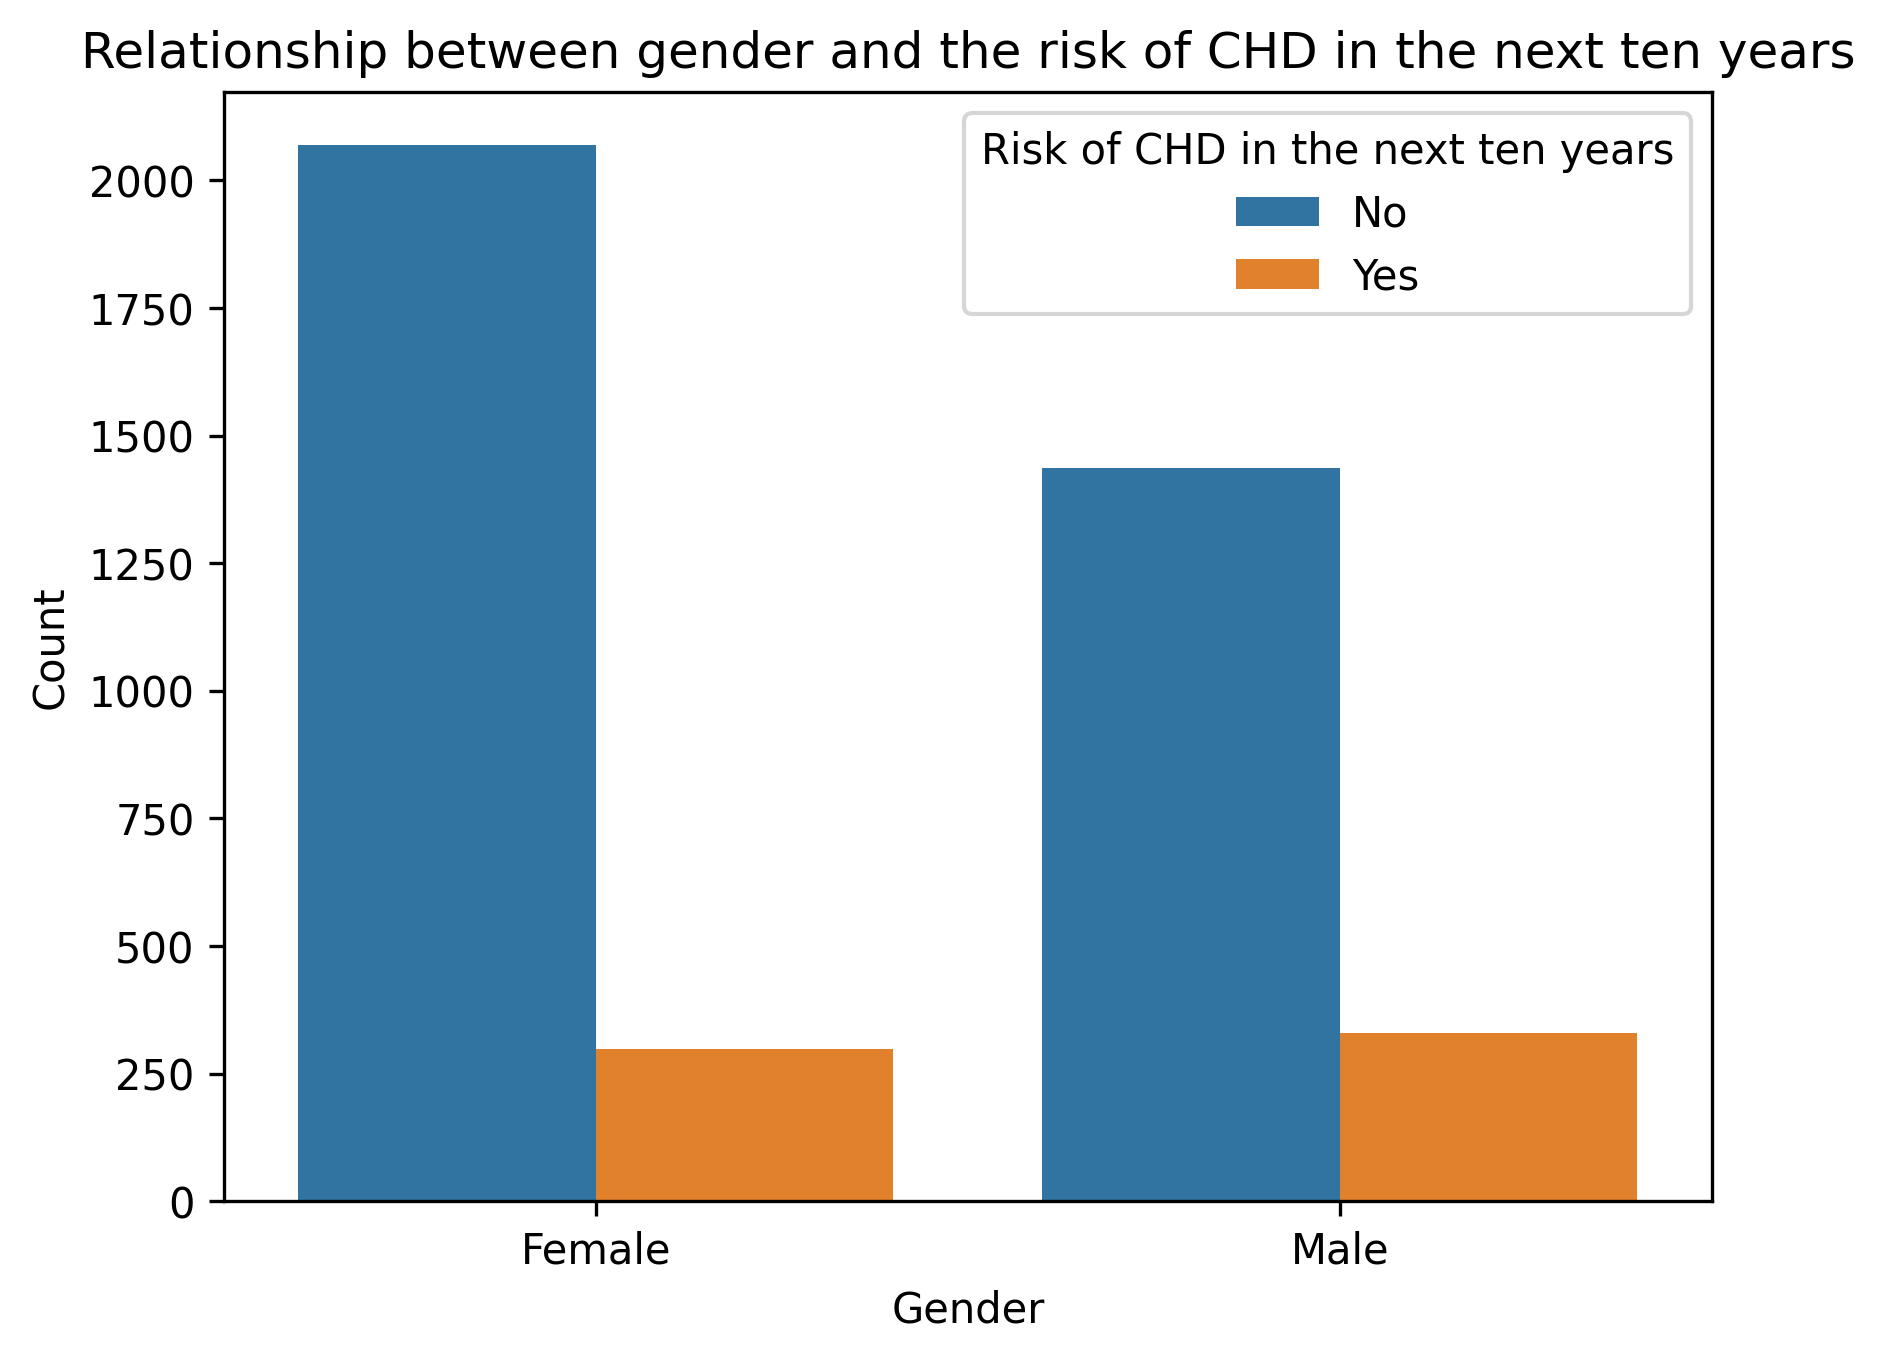

In [24]:
# Set image clarity
plt.rcParams['figure.dpi'] = 300

# 1. Relationship between gender and the risk of coronary heart disease (CHD) in the next ten years
gender_chd = pd.crosstab(df['male'], df['TenYearCHD'])
print('Crosstab of gender and the risk of CHD in the next ten years:')
print(gender_chd)

# Draw a bar chart
sns.countplot(x='male', hue='TenYearCHD', data=df)
plt.title('Relationship between gender and the risk of CHD in the next ten years')
plt.xlabel('Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Count')
plt.legend(title='Risk of CHD in the next ten years', labels=['No', 'Yes'])
plt.show()


Among people without coronary heart disease (TenYearCHD = 0), the number of women (male = 0) is higher than that of men (male = 1); whereas among people with coronary heart disease (TenYearCHD = 1), the number of men is slightly higher than that of women. This may suggest that gender factors have a certain influence on the risk of developing coronary heart disease in the next ten years.

## BMI

In [25]:
# Relationship between the number of combined diseases and body mass index (BMI)
df['disease_count'] = df[['prevalentStroke', 'prevalentHyp', 'diabetes']].sum(axis=1)
disease_bmi = df.groupby('disease_count')['BMI'].mean()
print('Mean relationship between the number of combined diseases and BMI:')
print(disease_bmi)

Mean relationship between the number of combined diseases and BMI:
disease_count
0    24.936659
1    27.443680
2    28.941292
3    33.320000
Name: BMI, dtype: float64


In medical research, multiple disease factors often interact with each other, collectively affecting human health. A history of stroke, hypertension, and diabetes are common chronic diseases and are closely related to cardiovascular health. Adding these three disease indicators to obtain a disease_count is aimed at measuring an individual's overall disease burden. In this way, multiple disease factors can be integrated into a single variable, making it easier to analyze their relationship with body mass index. 

This approach helps us understand what characteristics and trends the body may exhibit under the combined influence of multiple diseases.

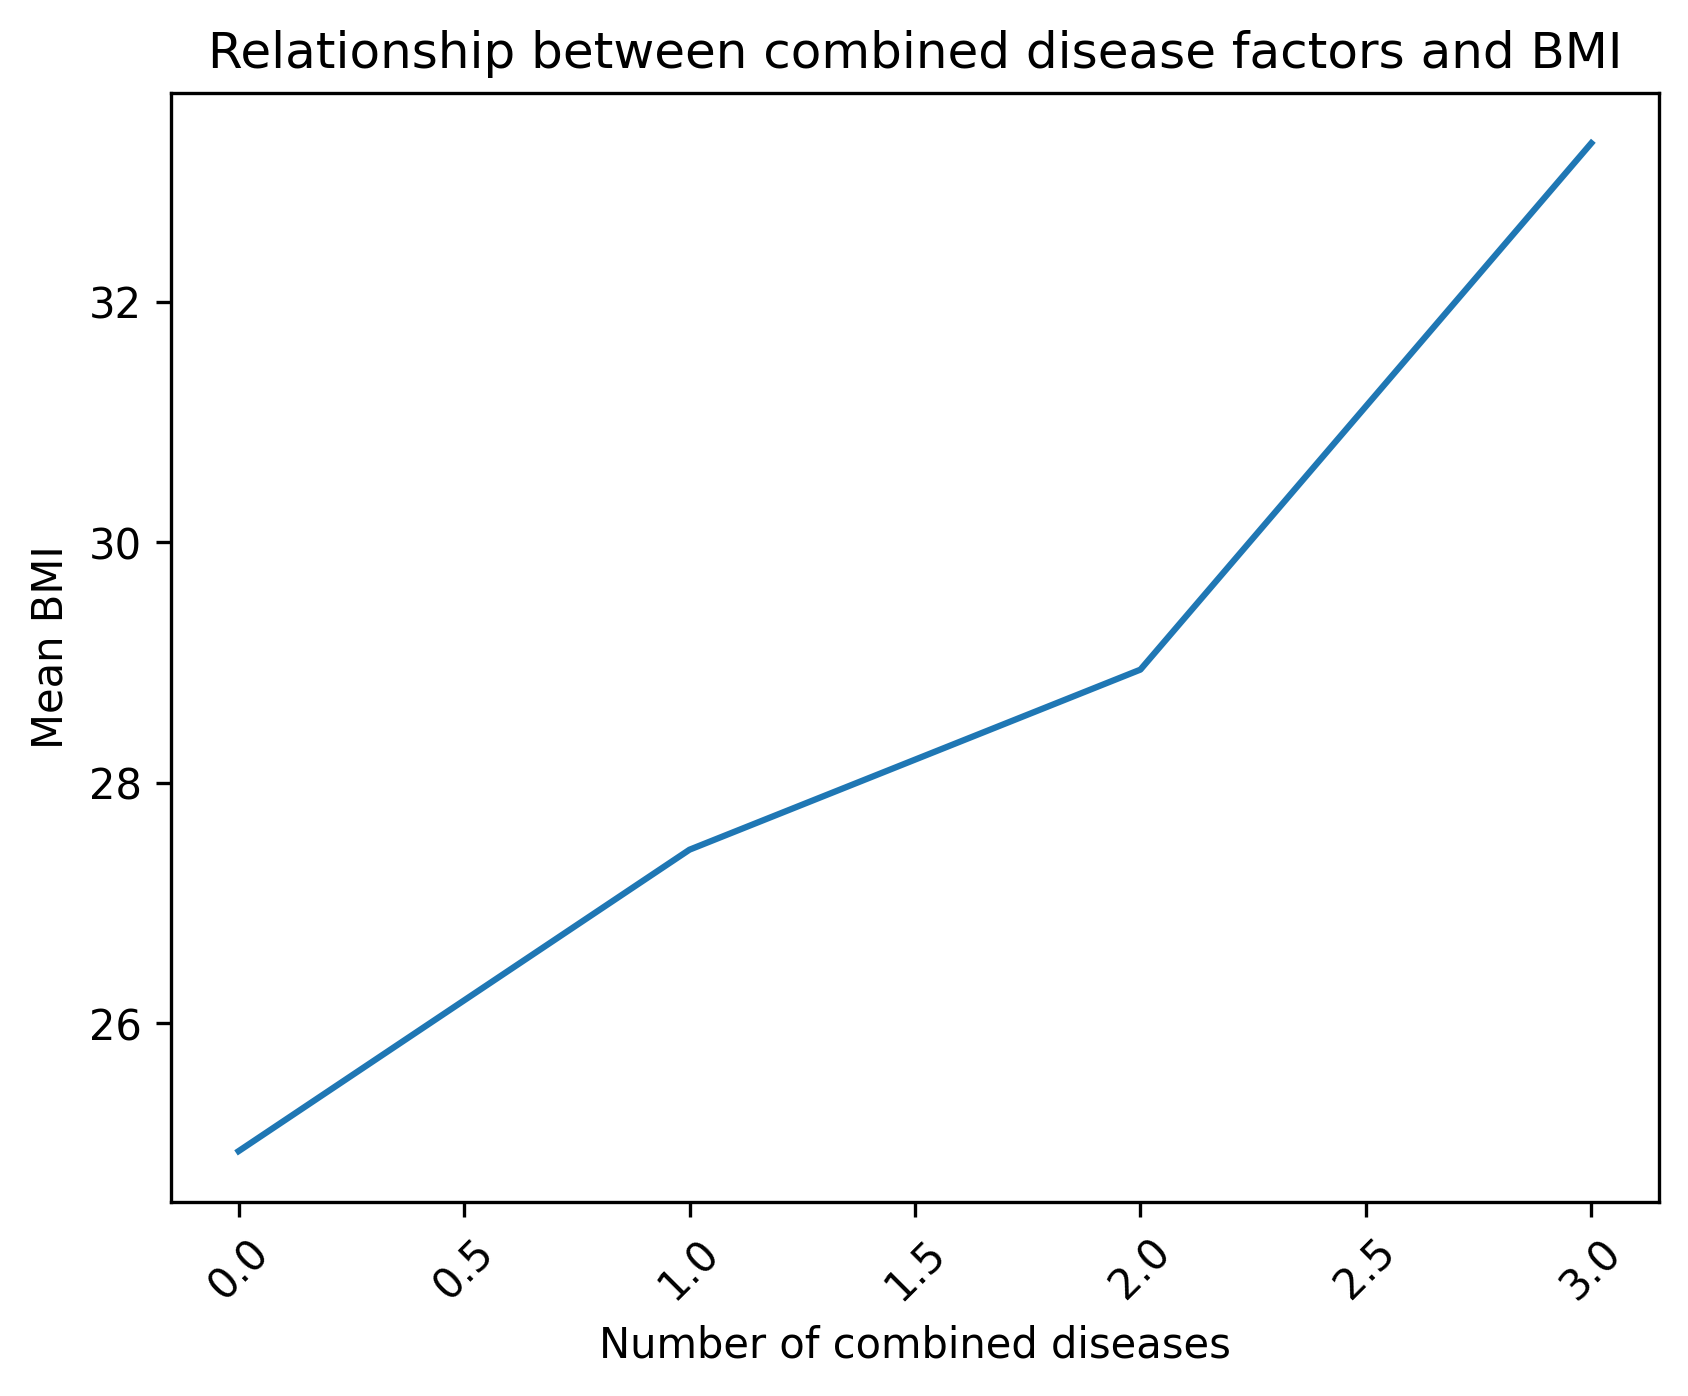

In [26]:
# Draw a line chart
plt.plot(disease_bmi.index, disease_bmi.values)
plt.title('Relationship between combined disease factors and BMI')
plt.xlabel('Number of combined diseases')
plt.xticks(rotation=45)
plt.ylabel('Mean BMI')
plt.show()

From the line chart, we can see that as the number of comorbidities increases, the mean body mass index shows an upward trend. 

This result suggests that obesity may be associated with the occurrence of multiple diseases, and a higher body mass index may be a risk factor for developing various diseases.